In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [2]:
cifar10 = tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
train_images.shape

(50000, 32, 32, 3)

In [5]:
len(train_labels)

50000

In [6]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
test_images.shape

(10000, 32, 32, 3)

In [8]:
len(test_images)

10000

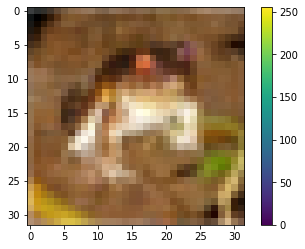

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [11]:
train_labels = np.asarray(train_labels).reshape(-1)

train_labels

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

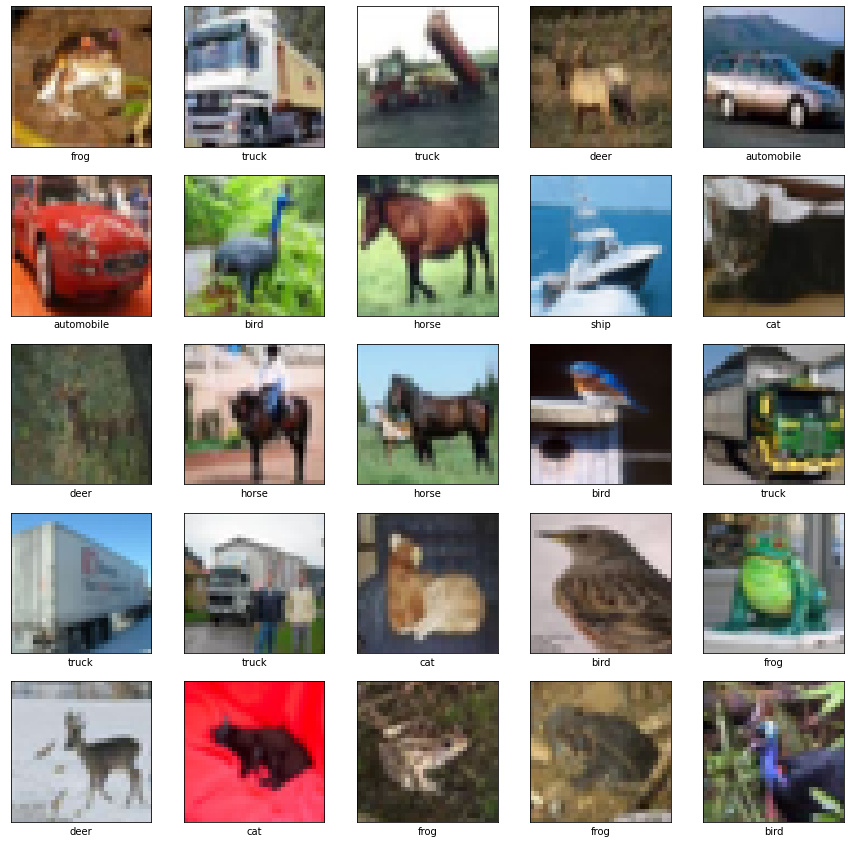

In [15]:
plt.figure(figsize=(15, 15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
# Build A CNN

model = tf.keras.models.Sequential()

In [18]:
# First Layer

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]))

In [19]:
# Second Layer

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [20]:
# Max Pooling Layer

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [23]:
# Third Layer

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [24]:
# Fourth Layer

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [25]:
# Max Pooling Layer

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [26]:
# Flattening Layer

model.add(tf.keras.layers.Flatten())

In [27]:
# Dropout Layer

model.add(tf.keras.layers.Dropout(0.5, noise_shape=None, seed=None))

In [28]:
# Adding the first fully connected layer

model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [29]:
# Output Layer

model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 264s 169ms/step - loss: 0.4909 - accuracy: 0.8249
Epoch 2/20
1563/1563 [==============================] - 264s 169ms/step - loss: 0.4656 - accuracy: 0.8334
Epoch 3/20
1563/1563 [==============================] - 262s 167ms/step - loss: 0.4428 - accuracy: 0.8407
Epoch 4/20
1563/1563 [==============================] - 261s 167ms/step - loss: 0.4297 - accuracy: 0.8467
Epoch 5/20
1563/1563 [==============================] - 261s 167ms/step - loss: 0.4073 - accuracy: 0.8536
Epoch 6/20
1563/1563 [==============================] - 261s 167ms/step - loss: 0.3863 - accuracy: 0.8612
Epoch 7/20
1563/1563 [==============================] - 262s 168ms/step - loss: 0.3788 - accuracy: 0.8649
Epoch 8/20
1563/1563 [==============================] - 261s 167ms/step - loss: 0.3551 - accuracy: 0.8728
Epoch 9/20
1563/1563 [==============================] - 261s 167ms/step - loss: 0.3579 - accuracy: 0.8720
Epoch 10/20
1563/1563 [=======================

In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 12s - loss: 0.7344 - accuracy: 0.7839 - 12s/epoch - 38ms/step

Test accuracy: 0.7839000225067139


In [37]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [39]:
predictions = probability_model.predict(test_images)

In [40]:
predictions[0]

array([0.08829955, 0.08833523, 0.08827962, 0.167947  , 0.08827268,
       0.12535283, 0.0883697 , 0.08829148, 0.08857147, 0.0882804 ],
      dtype=float32)

In [41]:
np.argmax(predictions[0])

3

In [42]:
test_labels[0]

array([3], dtype=uint8)

In [47]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)
  
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [48]:
test_labels = np.asarray(test_labels).reshape(-1)

test_labels

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

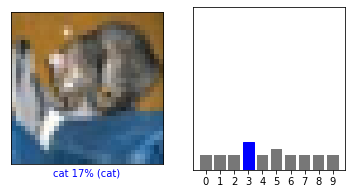

In [49]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

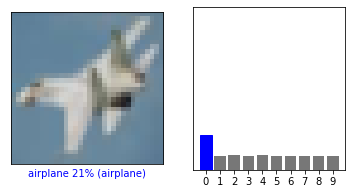

In [50]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

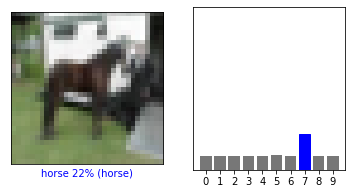

In [51]:
i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

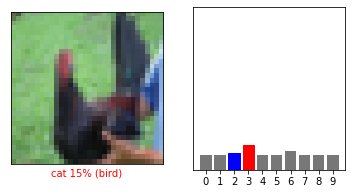

In [52]:
i = 25
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

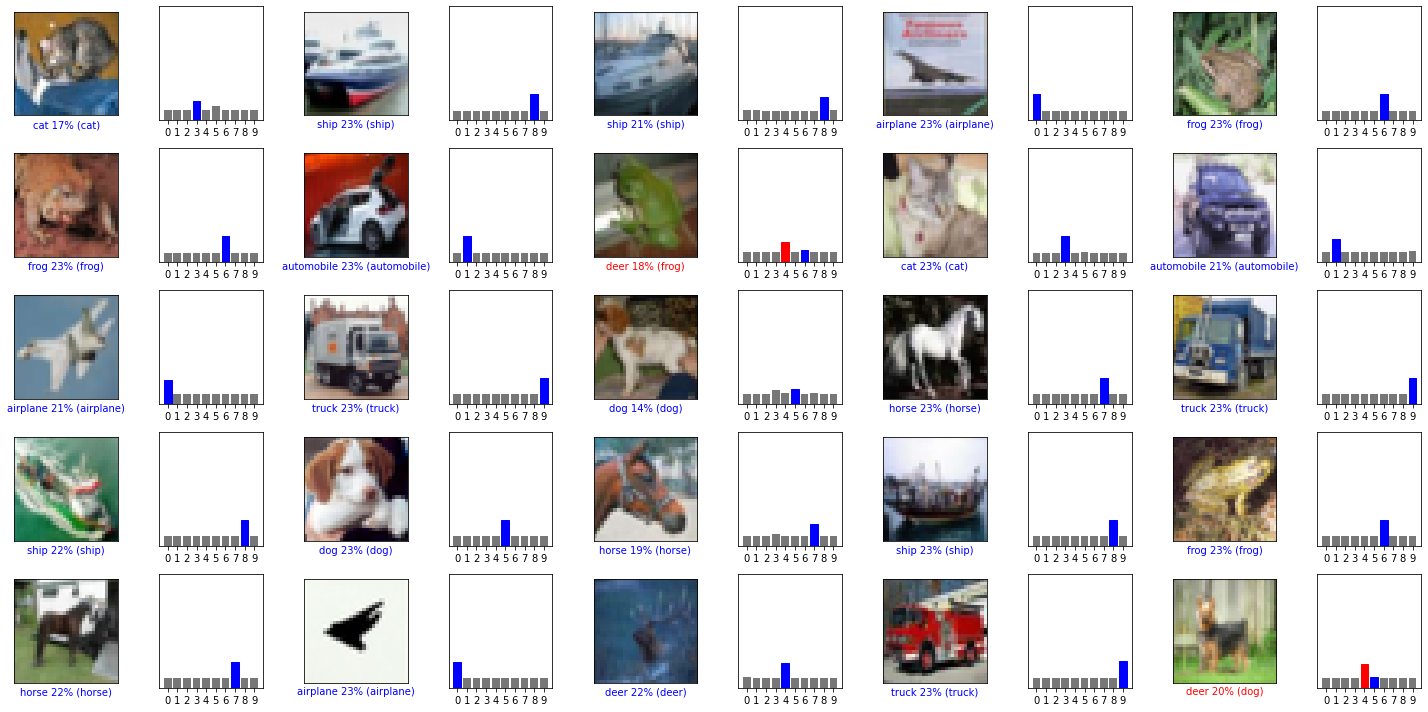

In [54]:
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [55]:
img = test_images[1]

print(img.shape)

(32, 32, 3)


In [56]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 32, 32, 3)


In [58]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[0.08534368 0.08538805 0.08534335 0.08534335 0.08534335 0.08534335
  0.08534335 0.08534335 0.23186482 0.08534336]]


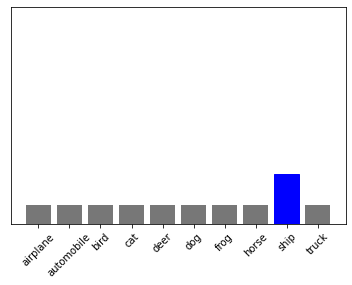

In [59]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [61]:
np.argmax(predictions_single[0])

8

In [62]:
# Conclusion

# With Conv2D the accuracy have doubled which was expected.